In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd


In [2]:
(.6*-4)/.4

-5.999999999999999

In [3]:
ws_hat = [.6,.4]
sds_hat = [1,2]
us_hat = [4,-6]

u_hat = 0
sd_hat = np.sqrt(ws_hat[0]*sds_hat[0]**2 + ws_hat[1]*sds_hat[1]**2 +ws_hat[0]*us_hat[0]**2+ws_hat[1]*us_hat[1]**2-(ws_hat[0]*us_hat[0]+ws_hat[1]*us_hat[1])**2)
print(sd_hat)

def p_hat(x):
    return np.dot(ws_hat, [np.exp(-.5*((x-u)/sd)**2)/np.sqrt(2*np.pi*sd**2) for u,sd in zip(us_hat,sds_hat)]) 

sd_1=sd_hat
u1 = 0
def p_1(x):
    return np.exp(-.5*((x-u1)/sd_1)**2)/np.sqrt(2*np.pi*sd_1**2)

sd_2=2
u2 = 0
def p_2(x):
    return np.exp(-.5*((x-u2)/sd_2)**2)/np.sqrt(2*np.pi*sd_2**2)

5.118593556827891


In [4]:
import matplotlib as mpl

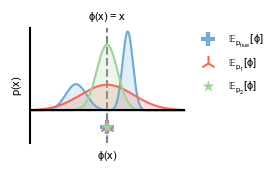

In [42]:
with mpl.rc_context(fname='matplotlibrc'):
    x = np.linspace(-20,20,1000)
    c1 = 'purple'
    c2 = 'teal'
    c3 = 'turquoise'
    c1 = '#eebd35'

    c1 = '#6FABD3'#'#3B6FA7'
    c2 = '#F26C5D'#9A3740'
    c3 = '#A0D39C'#'#8BCB8E' #347E52"

    alpha = .2
    lw = 1.5
    plt.figure(figsize=(2,1.5))
    plt.plot(x,p_hat(x), color =c1,lw=lw)
    plt.fill_between(x,p_hat(x),alpha=alpha,color=c1)
    plt.plot(x,p_1(x),color=c2,lw=lw)
    plt.fill_between(x,p_1(x),alpha=alpha,color = c2)
    plt.plot(x,p_2(x),color=c3,lw=lw)
    plt.fill_between(x,p_2(x),alpha=alpha,color=c3)
    plt.xlim(-15,15)
    plt.ylim(-.1,.25)
    plt.xticks([])
    plt.yticks([])
    plt.axvline(0, lw=1.5,ls='--',color='grey',zorder =-20)
    plt.axhline(0, lw=1.5,color='black',zorder =20)

    m1 = '+'
    m2='2'
    m3='*'
    lw1=3
    lw2=1.5
    lw3=.2
    ms1=100
    ms2=120
    ms3=70


    plt.scatter([0],[-.05],color = c1,marker =m1,s=ms1,lw=lw1, zorder = -10,label=r'$\mathbb{E}_{p_{true}}[\phi]$')
    plt.scatter([0],[-.05],color = c2,marker =m2, s=ms2,zorder=2, lw=lw2,label=r'$\mathbb{E}_{p_1}[\phi]$')
    plt.scatter([0],[-.05],color = c3,marker = m3,s=ms3,zorder=2, lw=lw3, label=r'$\mathbb{E}_{p_2}[\phi]$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(r"$\phi(x) = x$")

    # set z spine off
    plt.gca().spines[['bottom']].set_visible(False)
    plt.xlabel(r"$\phi(x)$")
    plt.ylabel(r"$p(x)$")
    plt.savefig("mixture2.pdf",bbox_inches='tight',transparent=True)

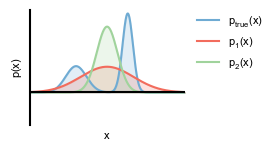

In [55]:
with mpl.rc_context(fname='matplotlibrc'):
    x = np.linspace(-20,20,1000)
    #c1 = 'purple'
    #c2 = 'teal'
    #c3 = 'turquoise'

    #c1 = '#eebd35'
    alpha = .2
    lw = 1.5
    plt.figure(figsize=(2,1.5))
    plt.plot(x,p_hat(x), color =c1,lw=lw, label =r'$p_{true}(x)$')
    plt.fill_between(x,p_hat(x),alpha=alpha,color=c1)
    plt.plot(x,p_1(x),color=c2,lw=lw, label =r'$p_1(x)$')
    plt.fill_between(x,p_1(x),alpha=alpha,color = c2)
    plt.plot(x,p_2(x),color=c3,lw=lw, label =r'$p_2(x)$')
    plt.fill_between(x,p_2(x),alpha=alpha,color=c3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlim(-15,15)
    plt.ylim(-.1,.25)
    plt.xticks([])
    plt.yticks([])
    plt.axhline(0, lw=1.5,color='black',zorder =20)
    plt.ylabel(r"$p(x)$")

    # set z spine off
    plt.gca().spines['bottom'].set_visible(False)
    plt.xlabel(r"$x$")
    plt.savefig("mixture.pdf",bbox_inches='tight',transparent=True)

In [44]:
n_samples = 1000
sample_p_hat = np.concatenate([np.random.normal(us_hat[0],sds_hat[0],int(n_samples*ws_hat[0])),
                                 np.random.normal(us_hat[1],sds_hat[1],int(n_samples*ws_hat[1]))])
sample_p1 = np.random.normal(0,sd_1,n_samples)
sample_p2 = np.random.normal(0,sd_2,n_samples)

data = np.array([sample_p_hat,sample_p1,sample_p2]).T
df1 = pd.DataFrame(data, columns=['p_hat','p1','p2'])


In [45]:
n_samples = 10000
sample_p_hat = np.concatenate([np.random.normal(us_hat[0],sds_hat[0],int(n_samples*ws_hat[0])),
                                 np.random.normal(us_hat[1],sds_hat[1],int(n_samples*ws_hat[1]))])

sample_p1 = np.random.normal(0,sd_1,n_samples)
sample_p2 = np.random.normal(0,sd_2,n_samples)

data_p_hat = np.array([sample_p_hat,sample_p_hat**2]).T
data_p1 = np.array([sample_p1,sample_p1**2]).T
data_p2 = np.array([sample_p2,sample_p2**2]).T

#data_p_hat = np.array([sample_p_hat,np.random.permutation(sample_p_hat)**2]).T
#data_p1 = np.array([sample_p1,np.random.permutation(sample_p1)**2]).T
#data_p2 = np.array([sample_p2,np.random.permutation(sample_p2)**2]).T


df_p_hat = pd.DataFrame(data_p_hat, columns=[r'$\phi_1$',r'$\phi_2$'])
df_p1 = pd.DataFrame(data_p1, columns=[r'$\phi_1$',r'$\phi_2$'])
df_p2 = pd.DataFrame(data_p2, columns=[r'$\phi_1$',r'$\phi_2$'])

mean_p_hat = data_p_hat.mean(axis=0)
mean_p1 = data_p1.mean(axis=0)
mean_p2 = data_p2.mean(axis=0)

In [46]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 12 14:04:23 2019

@author: artmenlope
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection



def fill_between_3d(ax,x1,y1,z1,x2,y2,z2,mode=1,c='steelblue',alpha=0.6):
    
    """
    
    Function similar to the matplotlib.pyplot.fill_between function but 
    for 3D plots.
       
    input:
        
        ax -> The axis where the function will plot.
        
        x1 -> 1D array. x coordinates of the first line.
        y1 -> 1D array. y coordinates of the first line.
        z1 -> 1D array. z coordinates of the first line.
        
        x2 -> 1D array. x coordinates of the second line.
        y2 -> 1D array. y coordinates of the second line.
        z2 -> 1D array. z coordinates of the second line.
    
    modes:

        mode = 1 -> Fill between the lines using the shortest distance between 
                    both. Makes a lot of single trapezoids in the diagonals 
                    between lines and then adds them into a single collection.
                    
        mode = 2 -> Uses the lines as the edges of one only 3d polygon.
           
    Other parameters (for matplotlib): 
        
        c -> the color of the polygon collection.
        alpha -> transparency of the polygon collection.
        
    """

    if mode == 1:
        
        for i in range(len(x1)-1):
            
            verts = [(x1[i],y1[i],z1[i]), (x1[i+1],y1[i+1],z1[i+1])] + \
                    [(x2[i+1],y2[i+1],z2[i+1]), (x2[i],y2[i],z2[i])]
            
            ax.add_collection3d(Poly3DCollection([verts],
                                                 alpha=alpha,
                                                 linewidths=0,
                                                 color=c))

    if mode == 2:
        
        verts = [(x1[i],y1[i],z1[i]) for i in range(len(x1))] + \
                [(x2[i],y2[i],z2[i]) for i in range(len(x2))]
                
        ax.add_collection3d(Poly3DCollection([verts],alpha=alpha,color=c))
            

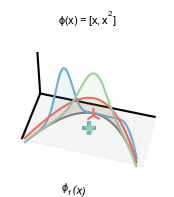

In [51]:
with mpl.rc_context(fname='matplotlibrc'):

    fig = plt.figure(figsize=(3,2))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect(aspect=(2, 1, 1))

    xlims = [-9,9]
    ylims = [-5,75]
    border = 5

    #ax.set_aspect('auto')
    x = np.linspace(xlims[0]-border,xlims[1]+border,1000)
    y_move =10

    y = x**2+y_move
    for i, y_i in enumerate(y):
        if y_i < (ylims[0]-border) or y_i > (ylims[1]+border):
            y[i]=np.nan


    eps = .2#.5
    y1 = y+eps
    y2 = y+eps*2
    set_ground = [x,y,np.zeros_like(x)]
    set_ground1 = [x,y1,np.zeros_like(x)]
    set_ground2 = [x,y2,np.zeros_like(x)]
    set_p_hat = [x,y,p_hat(x)]
    set_p1 = [x,y1,p_1(x)]
    set_p2 = [x,y2,p_2(x)]

    color='grey'
    #ax.plot(*set_ground,color='black')
    #ax.plot(*set_ground1,color='black')
    lw = 1.5
    sc=.2
    #plt.plot([5,xlims[1]],[ylims[0],ylims[0]],[0,0],c='black',lw=lw)
    plt.plot([xlims[0],xlims[1]],[ylims[0],ylims[0]],[0,0],c='black',lw=lw)
    plt.plot([xlims[1],xlims[1]],[ylims[0],ylims[1]],[0,0],c='black',lw=lw)
    
    #plt.plot([xlims[1],xlims[1]],[ylims[0],ylims[1]/2],[0,0],c='black',lw=lw)
    plt.plot([xlims[1],xlims[1]],[ylims[0],ylims[0]],[0,.2],c='black',lw=lw)


    ax.plot(*set_ground2,color=color,lw=lw)
    ax.plot(*set_p_hat,lw=lw,color=c1)
    ax.plot(*set_p1,lw=lw,color=c2)
    ax.plot(*set_p2,lw=lw,color=c3)

    alpha = .1
    fill_between_3d(ax, *set_ground, *set_p_hat, mode = 1,c=c1,alpha=alpha)
    fill_between_3d(ax, *set_ground1, *set_p1, mode = 1,c=c2,alpha=alpha)
    fill_between_3d(ax, *set_ground2, *set_p2, mode = 1,c=c3,alpha=alpha)



    ax.scatter(mean_p_hat[0],mean_p_hat[1]+y_move,0,c=c1,
                marker=m1,s=ms1,zorder=-100,lw=lw1)
    ax.scatter(mean_p2[0],mean_p2[1]+y_move,0,marker=m2,s=ms2,c=c2,zorder =2,lw=lw2)
    ax.scatter(mean_p1[0],mean_p1[1]+y_move,0,marker=m3,s=ms3,c=c3,zorder = 2,lw=lw3)

    #turn of grid
    ax.grid(False)
    plt.xticks([])
    plt.yticks([])
    ax.set_zticks([])
    #set z spine off
    #ax.spines['z'].set_visible(False)

    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.xaxis._axinfo['axisline']['color'] = "white"
    ax.xaxis._axinfo['axisline']['linewidth'] = 0

    plt.xlim(xlims[0],xlims[1])
    plt.ylim(ylims[0],ylims[1])
    ax.set_zlim(0,.2)

    #ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # set off background
    #ax.set_facecolor('white')
    # turn of grey box
    #ax.xaxis.pane.fill = False
    # get rid of axis
    #ax.axis('off')
    ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.view_init(50, 105)
    plt.title(r"$\phi(x) = [x, x^2]$")
    plt.xlabel(r"$\phi_1(x)$")
    plt.ylabel(r"$\phi_2(x)$")

plt.savefig("mixture3.pdf")

In [39]:
stop

NameError: name 'stop' is not defined

In [ ]:
n_samples = 10000
sample_p_hat = np.concatenate([np.random.normal(us_hat[0],sds_hat[0],int(n_samples*ws_hat[0])),
                                 np.random.normal(us_hat[1],sds_hat[1],int(n_samples*ws_hat[1]))])

sample_p1 = np.random.normal(0,sd_1,n_samples)
sample_p2 = np.random.normal(0,sd_2,n_samples)

data_p_hat = np.array([sample_p_hat,sample_p_hat**2,sample_p_hat**3]).T
data_p1 = np.array([sample_p1,sample_p1**2,sample_p1**3]).T
data_p2 = np.array([sample_p2,sample_p2**2,sample_p2**3]).T


data_p_hat = np.array([sample_p_hat,sample_p_hat**2,sample_p_hat**3]).T
data_p1 = np.array([sample_p1,sample_p1**2,sample_p1**3]).T
data_p2 = np.array([sample_p2,sample_p2**2,sample_p2**3]).T


data_p_hat = np.array([sample_p_hat,np.random.permutation(sample_p_hat)**2,
                       np.random.permutation(sample_p_hat)**3]).T
data_p1 = np.array([sample_p1,np.random.permutation(sample_p1)**2,
                    np.random.permutation(sample_p1)**3]).T
data_p2 = np.array([sample_p2,np.random.permutation(sample_p2)**2,
                    np.random.permutation(sample_p2)**3]).T

#df_p_hat = pd.DataFrame(data_p_hat, columns=[r'$\phi_1$',r'$\phi_2$'])
#df_p1 = pd.DataFrame(data_p1, columns=[r'$\phi_1$',r'$\phi_2$'])
#df_p2 = pd.DataFrame(data_p2, columns=[r'$\phi_1$',r'$\phi_2$'])

mean_p_hat = data_p_hat.mean(axis=0)
mean_p1 = data_p1.mean(axis=0)
mean_p2 = data_p2.mean(axis=0)

/var/folders/7z/c9g_hq_9025gxx730qgmlh4w0000gn/T/ipykernel_1983/2020679426.py:9: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(mean_p_hat[0],mean_p_hat[1],mean_p_hat[2],c='tab:blue',edgecolors='black',


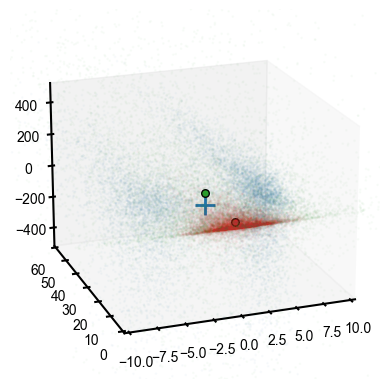

In [ ]:
#make 3d plot
fig = plt.figure()
alpha = .02
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_p1[:,0],data_p1[:,1],data_p1[:,2],c='tab:green',s=1,alpha = alpha)
ax.scatter(data_p_hat[:,0],data_p_hat[:,1],data_p_hat[:,2],c='tab:blue',s=1,alpha = alpha)
ax.scatter(data_p2[:,0],data_p2[:,1],data_p2[:,2],c='tab:red',s=1,alpha = alpha)
ax.scatter(mean_p1[0],mean_p1[1],mean_p1[2],c='tab:green',edgecolors='black',s=30)
ax.scatter(mean_p_hat[0],mean_p_hat[1],mean_p_hat[2],c='tab:blue',edgecolors='black',
            marker='+',s=200,zorder=-1,lw=2)
ax.scatter(mean_p2[0],mean_p2[1],mean_p2[2],c='tab:red',edgecolors='black',s=30)
plt.xlim(-10,10)
plt.ylim(0,60)
#set zlim
ax.set_zlim(-500,500)
# set orientation
ax.view_init(20, -110)
# set grey background off
#ax.set_facecolor('white')
# remove grid
ax.grid(False)

#

In [ ]:
n_samples = 10000
sample_p_hat = np.concatenate([np.random.normal(us_hat[0],sds_hat[0],int(n_samples*ws_hat[0])),
                                 np.random.normal(us_hat[1],sds_hat[1],int(n_samples*ws_hat[1]))])

sample_p1 = np.random.normal(0,sd_1,n_samples)
sample_p2 = np.random.normal(0,sd_2,n_samples)

data_p_hat = np.array([sample_p_hat,np.log(sample_p_hat**2)]).T
data_p1 = np.array([sample_p1,np.log(sample_p1**2)]).T
data_p2 = np.array([sample_p2,np.log(sample_p2**2)]).T


df_p_hat = pd.DataFrame(data_p_hat, columns=[r'$\phi_1$',r'$\phi_2$'])
df_p1 = pd.DataFrame(data_p1, columns=[r'$\phi_1$',r'$\phi_2$'])
df_p2 = pd.DataFrame(data_p2, columns=[r'$\phi_1$',r'$\phi_2$'])

mean_p_hat = data_p_hat.mean(axis=0)
mean_p1 = data_p1.mean(axis=0)
mean_p2 = data_p2.mean(axis=0)

(-10.0, 5.0)

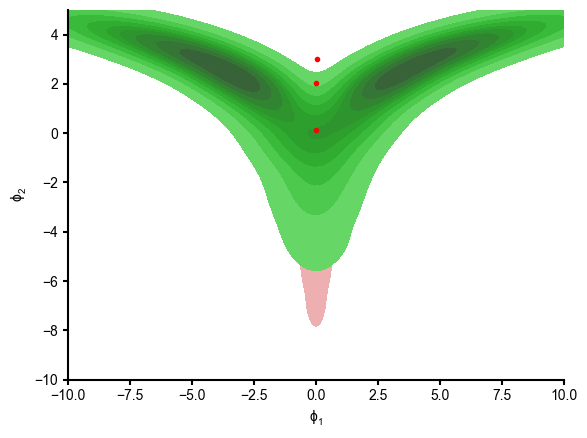

In [ ]:
sns.kdeplot(
    data=df_p2, fill=True,x = r'$\phi_1$', y = r'$\phi_2$',bw_adjust=1,
    clip = [[-np.inf, np.inf],[-np.inf, np.inf]], color ='tab:red'
)
sns.kdeplot(
    data=df_p_hat, fill=True,x = r'$\phi_1$', y = r'$\phi_2$',bw_adjust=1,
        clip = [[-np.inf, np.inf],[-np.inf, np.inf]], color= 'tab:blue'

)
sns.kdeplot(
    data=df_p1, fill=True,x = r'$\phi_1$', y = r'$\phi_2$', bw_adjust=1,
    clip = [[-np.inf, np.inf],[-np.inf, np.inf]],color='tab:green'

)

plt.scatter(mean_p_hat[0],mean_p_hat[1],c='r')
plt.scatter(mean_p1[0],mean_p1[1],c='r')
plt.scatter(mean_p2[0],mean_p2[1],c='r')


plt.xlim(-10,10)
plt.ylim(-10,5)



In [ ]:
from scipy.stats import gamma

In [ ]:
def phi_p1(x):
    phi_1 = np.exp(-.5*((x-u1)/sd_1)**2)/np.sqrt(2*np.pi*sd_1**2)
    #see: https://stats.stackexchange.com/questions/93383/square-of-normal-distribution-with-specific-variance
    phi_2 = gamma.pdf(x,.5,.5*(sd_1**2))
    return [phi_1,phi_2]


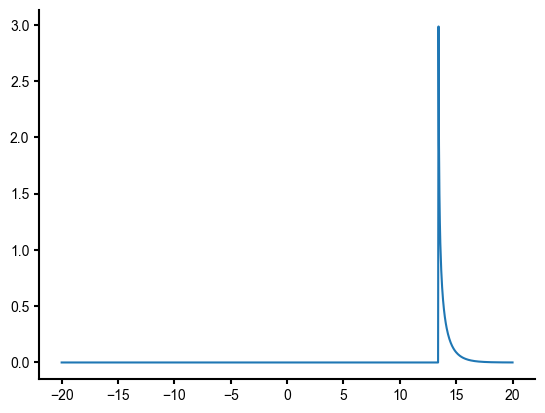

In [ ]:
phi = phi_p1(x)
plt.plot(x,phi[1])


thresh = .1
alpha=.8
bw_adjust = .1
sns.kdeplot(
    data=df_p1, fill=True,x = r'$\phi_1$', y = r'$\phi_2$', bw_adjust=bw_adjust,
      clip = [[-np.inf, np.inf],[0, np.inf]], cmap="Greens", 
        thresh=thresh,alpha=alpha
)

sns.kdeplot(
    data=df_p_hat, fill=True,x = r'$\phi_1$', y = r'$\phi_2$',bw_adjust=bw_adjust,
        clip = [[-np.inf, np.inf],[0, np.inf]], cmap="Blues", 
        thresh=thresh,alpha=alpha

)
sns.kdeplot(
    data=df_p2, fill=True,x = r'$\phi_1$', y = r'$\phi_2$',bw_adjust=bw_adjust,
      clip = [[-np.inf, np.inf],[0, np.inf]], cmap="Reds", 
        thresh=thresh,alpha=alpha
)

plt.scatter(mean_p1[0],mean_p1[1],c='tab:green',edgecolors='black',s=30)
plt.scatter(mean_p_hat[0],mean_p_hat[1],c='tab:blue',edgecolors='black',
            marker='+',s=200,zorder=-1,lw=2)
plt.scatter(mean_p2[0],mean_p2[1],c='tab:red',edgecolors='black',s=30)


plt.xlim(-10,10)
plt.ylim(0,60)

#set spines off
plt.gca().spines[['top','right']].set_visible(False)
plt.xticks([])
plt.yticks([])

#plt.scatter(data_p1[:,0],data_p1[:,1])#,data_p1[:,2],c='tab:green',s=1,alpha = alpha)
#plt.scatter(data_p_hat[:,0],data_p_hat[:,1])#,data_p_hat[:,2],c='tab:blue',s=1,alpha = alpha)
#plt.scatter(data_p2[:,0],data_p2[:,1])#,data_p2[:,2],c='tab:red',s=1,alpha = alpha)
